# **Drug Discovery [Part 4] Regression Models Comparision**

In **Part 4**, we have built Random Forest, Linear Regression, Decision Tree, Neural Network and K Neighbours Classifier and have done a comparative study of them.
---

## **1. Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


## **2. Load the data set**

In [ ]:
df = pd.read_csv('/content/coronavirus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Coronavirus*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
84,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
Y = df.pIC50
Y

0     5.142668
1     5.026872
2     4.869666
3     4.882397
4     5.698970
        ...   
81    4.675718
82    3.644548
83    4.412289
84    4.841638
85    4.675718
Name: pIC50, Length: 86, dtype: float64

### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(86, 881)

In [ ]:
Y.shape

(86,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(86, 185)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((68, 185), (68,))

In [ ]:
X_test.shape, Y_test.shape

((18, 185), (18,))

## **5. Building different Regression Models and figuring out which works the best!**

In [ ]:
### RANDOM FOREST
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:",r2)
print("MSE Score:",mse(Y_test, Y_pred))

R2 Score: 0.5587870273727049
MSE Score: 0.3090770988642117


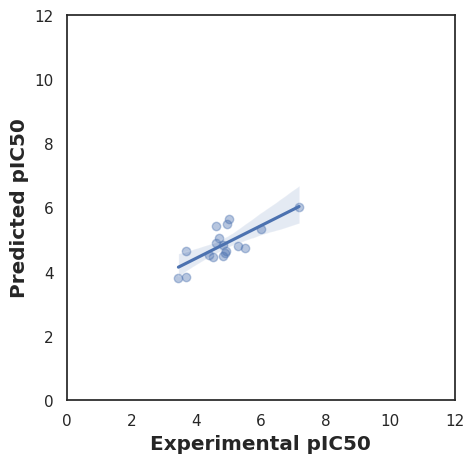

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

In [ ]:
### LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)
print("MSE Score:",mse(Y_test, Y_pred))

R2 Score: -1.3330870567377392e+22
MSE Score: 9.33849876571924e+21


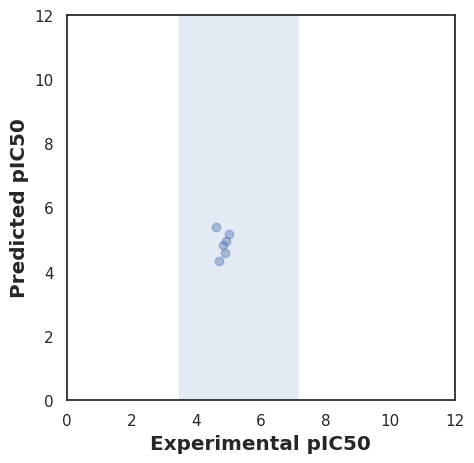

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

In [ ]:
### DECISION TREE ###
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.32871911073405563
R-squared: 0.5307477113660477


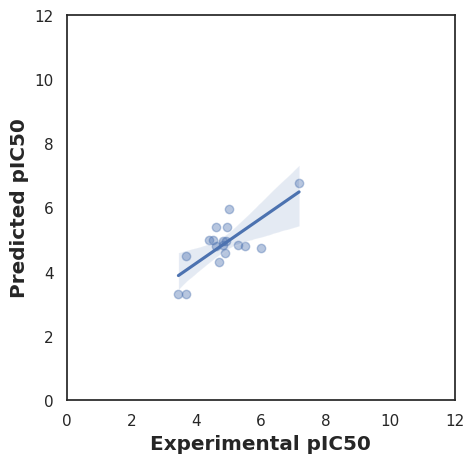

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

Epoch 1/100
2/2 [==============================] - 4s 493ms/step - loss: 21.7904 - val_loss: 19.2672
Epoch 2/100
2/2 [==============================] - 0s 104ms/step - loss: 16.1747 - val_loss: 13.6615
Epoch 3/100
2/2 [==============================] - 0s 133ms/step - loss: 11.0554 - val_loss: 8.5839
Epoch 4/100
2/2 [==============================] - 0s 62ms/step - loss: 6.5848 - val_loss: 4.7497
Epoch 5/100
2/2 [==============================] - 0s 71ms/step - loss: 3.5858 - val_loss: 3.1881
Epoch 6/100
2/2 [==============================] - 0s 82ms/step - loss: 3.1035 - val_loss: 3.6358
Epoch 7/100
2/2 [==============================] - 0s 169ms/step - loss: 3.5153 - val_loss: 3.4998
Epoch 8/100
2/2 [==============================] - 0s 109ms/step - loss: 3.4414 - val_loss: 2.7649
Epoch 9/100
2/2 [==============================] - 0s 77ms/step - loss: 2.6013 - val_loss: 2.0845
Epoch 10/100
2/2 [==============================] - 0s 116ms/step - loss: 1.7992 - val_loss: 1.8812
Epoch 11

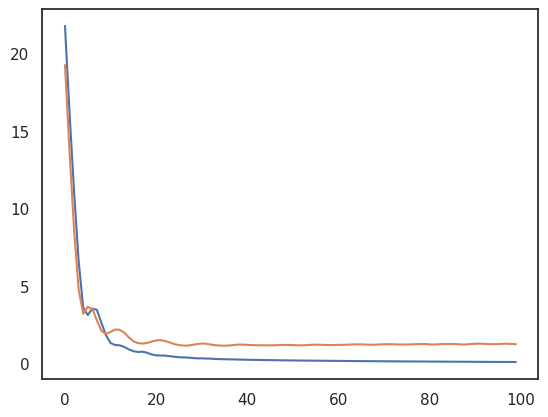

In [ ]:
### NEURAL NETWORK ###
from keras import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import numpy as np

model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = 185))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer="Adam", loss="mse")
history = model.fit(X_train, Y_train, epochs = 100, validation_split = 0.2)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
Y_pred = model.predict(X_test)
print("R2 Score:",r2_score(Y_test, Y_pred))
print("MSE Score:",mean_squared_error(Y_test, Y_pred))

In [ ]:
### K NEIGHBOURS REGRESSOR ###
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
knn = KNeighborsRegressor()
# knn.fit(X_train, Y_train)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, Y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best R² score: {grid_search.best_score_:.2f}')

Y_pred=grid_search.best_estimator_.predict(X_test)
mse= mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MSE Score:",mse, "\nR2 Score:",r2)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best R² score: 0.48
MSE Score: 0.1859838890158649 
R2 Score: 0.7345047406131961


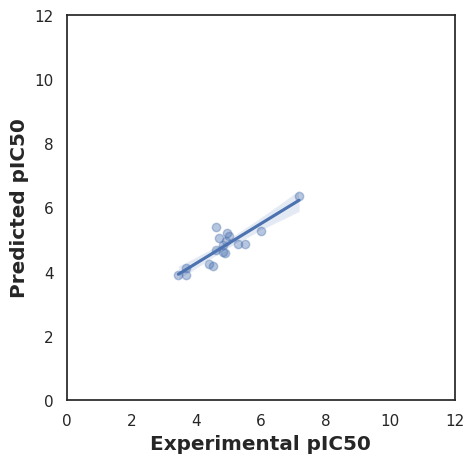

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

##**R2 Scores for:**

RandomForest: 0.55

Linear reg: -1.33e22

Decision Tree: 0.53

Neural Network: 0.76

KNeighbours Regressor: 0.73

##**MSE for:**

RandomForest: 0.30

Linear reg: 9.33e21

Decision Tree: 0.32

Neural Network: 0.16

KNeighbours Regressor: 0.18